In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/harshan/Downloads/All dataset/08-Linear-Regression-Models/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


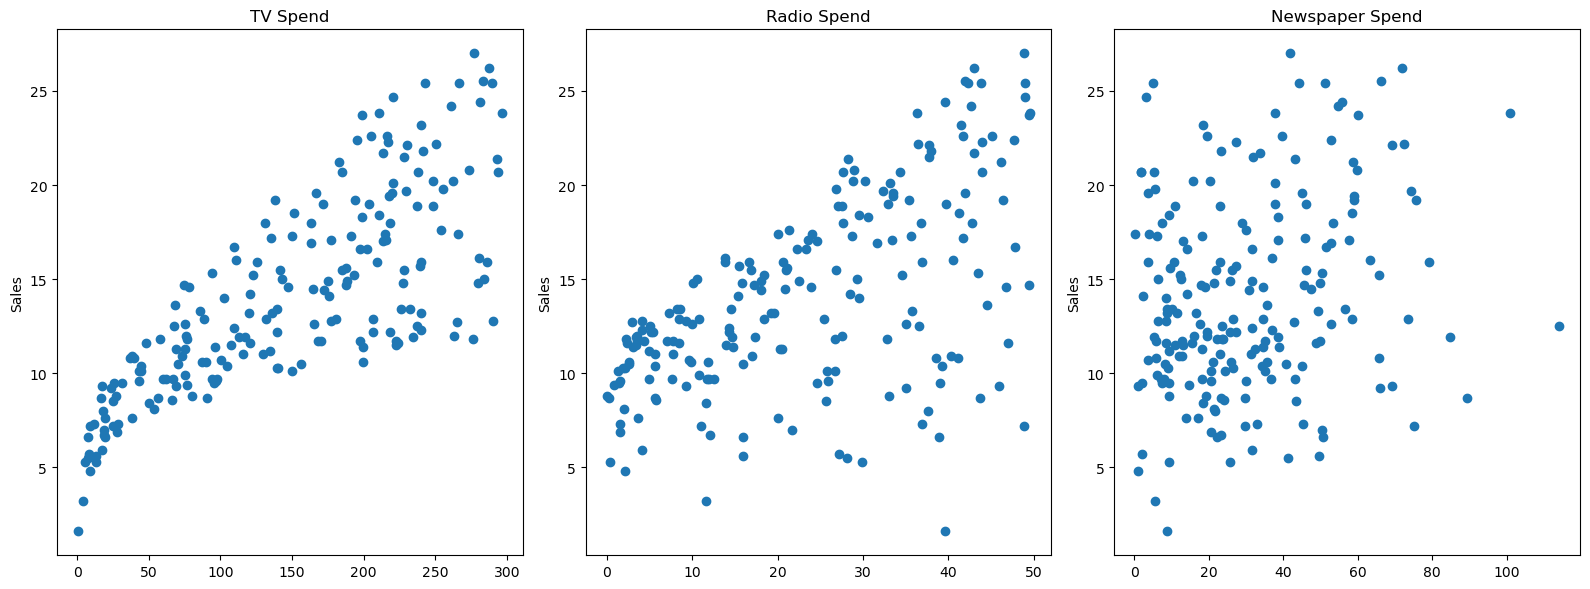

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [5]:
X = df.drop('sales',axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [9]:
len(df)

200

In [10]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [11]:
len(y_test)

60

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
test_predictions  =  model.predict(X_test) # Because X_test is the feature it was not trained on.

In [16]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [17]:
# X_test.head()

In [18]:
# y_test

In [19]:
#We sou;d compare test_predtictions to y_test

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

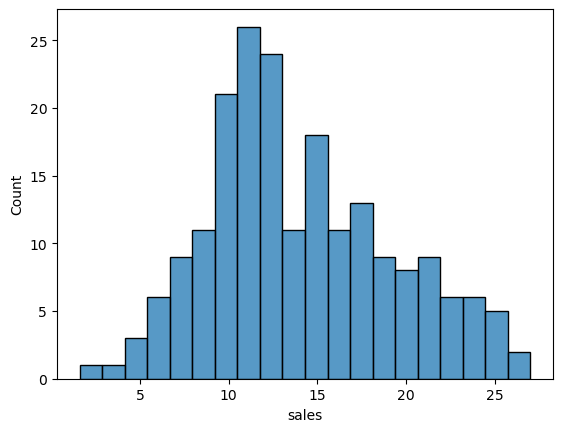

In [22]:
sns.histplot(data=df,x='sales', bins = 20)

In [23]:
mean_absolute_error(y_test,test_predictions) #1.2137457736144808 error in an average of 14.022500000000003 (error less than 10%)

1.2137457736144808

In [24]:
# RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993877

In [25]:
# check if were using right model for the data sets.

In [26]:
test_residuals = y_test - test_predictions

In [27]:
test_residuals
# negative is overestimating
# postive is underestimating
# IF we have perfect model we should see zero

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

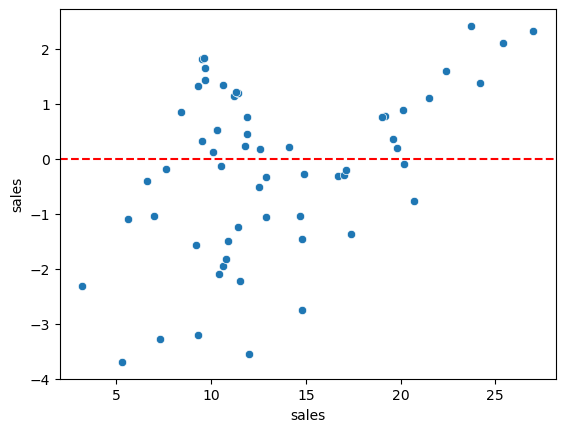

In [28]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',linestyle='--')

#there is no clear curve or pattern so linear regreesion is a valid choice

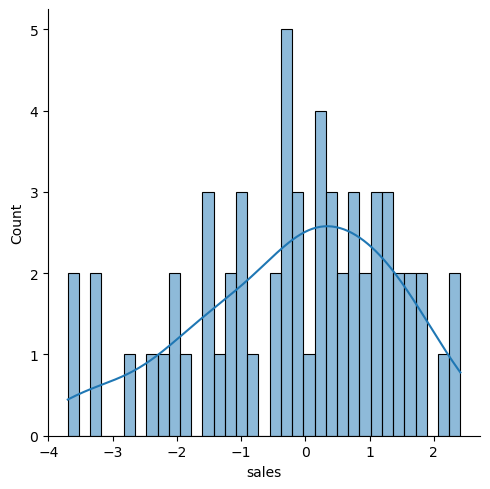

In [29]:
sns.displot(test_residuals,bins=35,kde=True)

In [30]:
# this can be used in case you can't read the direct distribution plot

In [31]:
import scipy as sp

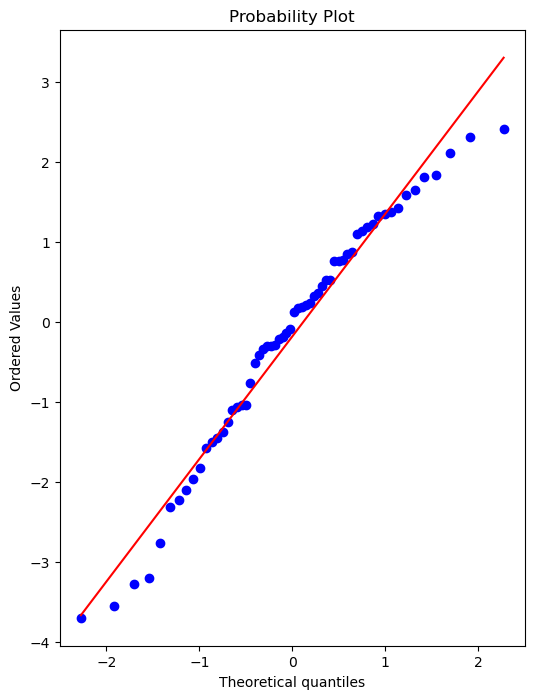

In [32]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot return the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

# Linear regression is valid choice for this Dataset.

# Now change the hyperparameters and Retrain Model on Full Data

In [33]:
final_model = LinearRegression()

In [34]:
final_model.fit(X,y)

LinearRegression()

In [35]:
final_model.coef_ #if if we go from 230 to 231 in TV sales holding radio and newspaper fixesd, we would expect an increase of 0.045 in sales

array([ 0.04576465,  0.18853002, -0.00103749])

In [36]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [37]:
y_hat = final_model.predict(X)

In [38]:
#  y_hat

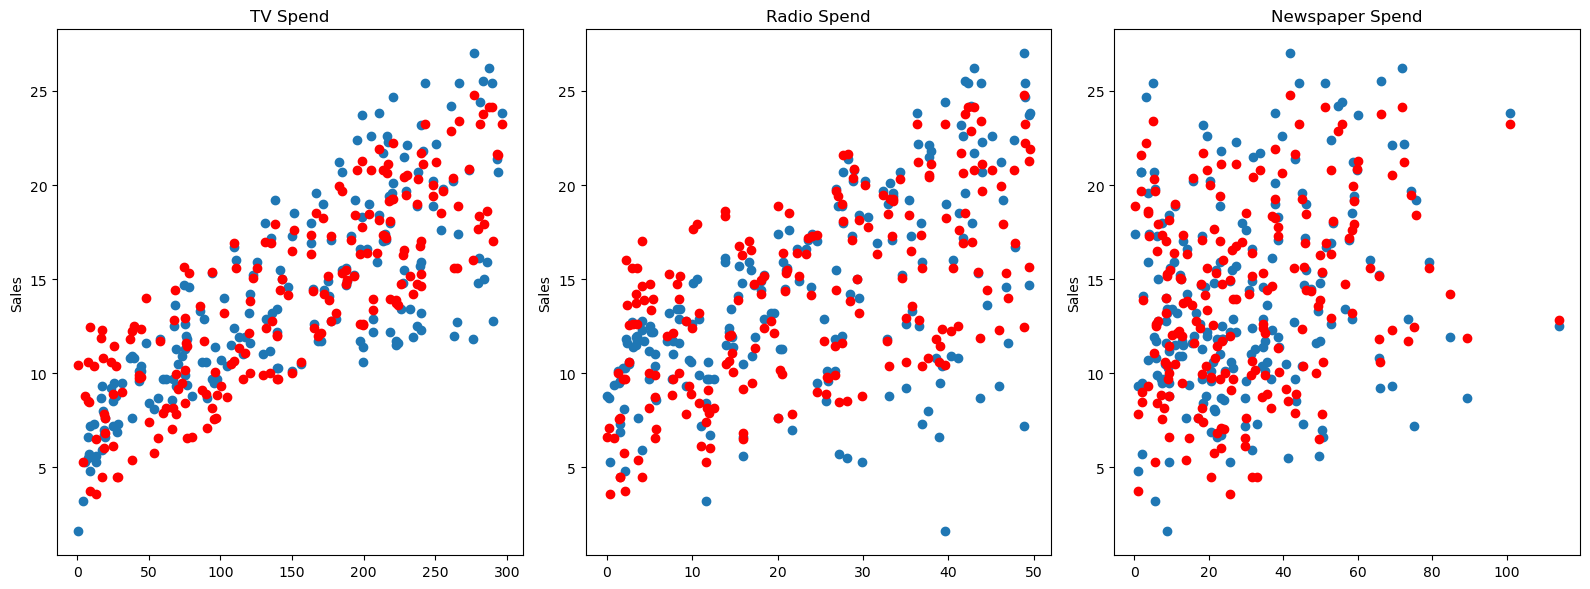

In [39]:
#predicted poinsts are in red
#True points are in default blue

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [40]:
# to save and use it for future use

In [41]:
from joblib import dump,load

In [42]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [43]:
loaded_model = load('final_sales_model.joblib')

In [44]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
X.shape

(200, 3)

In [46]:
#Training with other data with this model. 
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [47]:
loaded_model.predict(campaign)

/home/harshan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])